# **Asignación 3 - Masas**
## **Nombres**: Damian Ospina y Jose Castillo



### *Se importan las librerias que se van a utilizar*

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import plotly.express as px
import plotly.graph_objects as go

### *Se añade el archivo que incluye para cada partícula del sistema, su masa y su posición (x,y,z) en un volumen*

In [43]:
data = pd.read_csv('datosmasas.csv')
data.head()
Num = data['particula']
masas = data['masas']
posición_x = data['x']
posición_y = data['y']
posición_z = data['z']
cantidad_particulas = len(Num)

## Caso Bidimensional 

### *Graficamos las posiciones (x,y) para tener un modelo 2D y ver como se encuentran distribuidas las partículas*


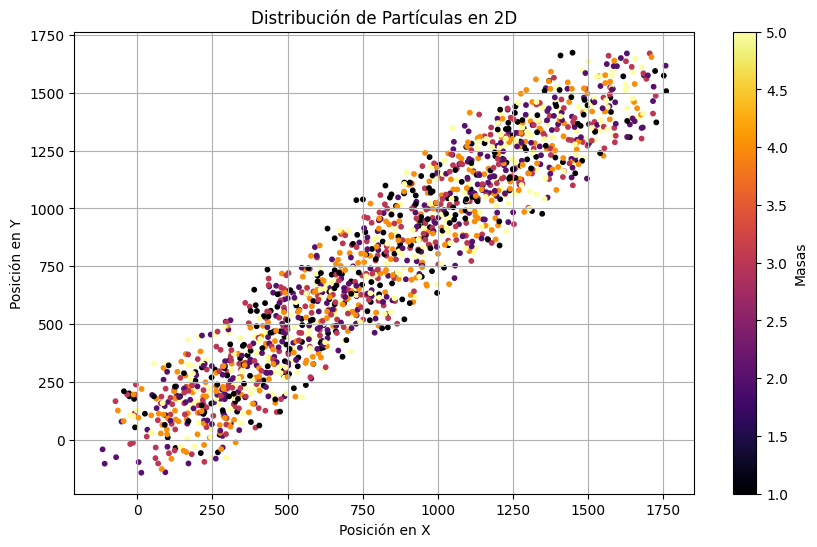

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(posición_x, posición_y, c=masas, cmap='inferno', s=10)
plt.colorbar(label='Masas')
plt.title('Distribución de Partículas en 2D')
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.grid(True)
plt.show()

### *Calculamos los **momentos centrados** de orden 0,1,2 para el caso bidimensional*

In [4]:
#Momento de Orden 0 (MASA TOTAL DEL SISTEMA)
masa_total = int(np.sum(masas))
print("Momento de Orden 0 (Masa Total del Sistema):", masa_total)


Momento de Orden 0 (Masa Total del Sistema): 4627


In [5]:
#Momento de Orden 1 (CENTRO DE MASA DEL SISTEMA)
#El centro de masa, es el promedio pesado de las masas de las partículas del sistema

# Calculamos el centro de masa
centro_masa_x = np.sum(masas * posición_x) / masa_total
centro_masa_y = np.sum(masas * posición_y) / masa_total

Centro_x = round(centro_masa_x, 2)
Centro_y = round(centro_masa_y, 2)

centro_masa2D = np.array([Centro_x, Centro_y])
print("Centro de masa del sistema:", centro_masa2D)

Centro de masa del sistema: [825.82 776.92]


In [25]:

# Se calcula los momentos de inercia para las dos coordenadas

tensor_inercia2D = np.zeros((2, 2), dtype=float)

np.set_printoptions(precision=2)

for i in range(len(masas)):
  tensor_inercia2D[0, 0] += masas[i] * (posición_y[i] - centro_masa_y)**2
  tensor_inercia2D[1, 1] += masas[i] * (posición_x[i] - centro_masa_x)**2
  tensor_inercia2D[0, 1] -= masas[i] * (posición_x[i] - centro_masa_x) * (posición_y[i] - centro_masa_y)

tensor_inercia2D[1, 0] = tensor_inercia2D[0, 1]

print(f"El tensor de inercia del sistema es:")
print(np.round(tensor_inercia2D, 2))
    
print()

El tensor de inercia del sistema es:
[[ 9.64e+08 -9.12e+08]
 [-9.12e+08  9.59e+08]]



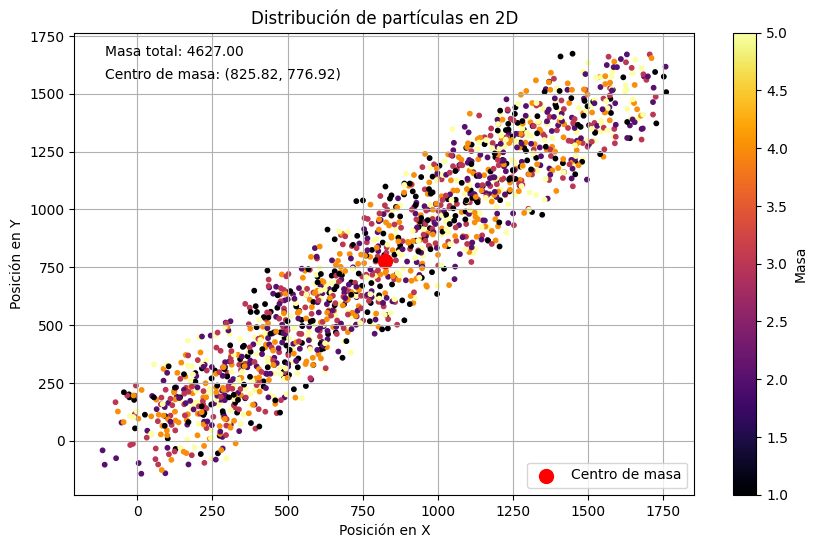

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(posición_x, posición_y, c=masas, cmap='inferno', s=10)
plt.colorbar(label='Masa')
plt.title('Distribución de partículas en 2D')
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.grid(True)
plt.scatter(float(centro_masa_x), float(centro_masa_y), color='red', s=100, label='Centro de masa')

# Mostrar la masa total y centro de masa
plt.text(0.05, 0.95, f'Masa total: {masa_total:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'Centro de masa: ({float(centro_masa_x):.2f}, {float(centro_masa_y):.2f})', transform=plt.gca().transAxes)

plt.legend(loc='lower right')
plt.show()

In [45]:
#Copilación de resultados en el caso bidimensional

np.set_printoptions(precision=3, suppress=False) 


print()
print(f"La masa total del sistema es: {masa_total}")
print()
print(f"El centro de masa del sistema es: \n {centro_masa2D}")
print()
print(f"El tensor momento de inercia es: \n {tensor_inercia2D}")
print()

#Calculamos los momentos de inercia principales
autovalores2D, autovectores2D = np.linalg.eigh(tensor_inercia2D)

#Esta es la Matriz de Transformación
print(f"Los autovectores del tensor de inercia son:\n", autovectores2D)
print()

#Estos representan los Ejes Principales de Inercia
print(f"Los autovalores del tensor de inercia son: \n", autovalores2D)
print()


La masa total del sistema es: 4627

El centro de masa del sistema es: 
 [825.82 776.92]

El tensor momento de inercia es: 
 [[ 9.637e+08 -9.117e+08]
 [-9.117e+08  9.585e+08]]

Los autovectores del tensor de inercia son:
 [[-0.706 -0.708]
 [-0.708  0.706]]

Los autovalores del tensor de inercia son: 
 [4.935e+07 1.873e+09]



## Caso Tridimensional

### *Graficamos las posiciones (x,y,z) para tener un modelo 3D y ver como se encuentran distribuidas las partículas en el volumen*


In [37]:
fig = px.scatter_3d(data, x='x', y='y', z='z', color='masas', size='masas', opacity=1)
fig.update_layout(title='Distribución de partículas en 3D', scene=dict(
    xaxis_title='Posición en X',
    yaxis_title='Posición en Y',
    zaxis_title='Posición en Z'
))
fig.show(renderer='browser')

### *Calculamos los **momentos centrados** de orden 0,1,2 para el caso tridimensional*

In [11]:
#Momento de Orden 0 (MASA TOTAL DEL SISTEMA) caso tridimencional

masa_total = int(np.sum(masas))
print("Momento de Orden 0 (Masa Total del Sistema):", masa_total)

Momento de Orden 0 (Masa Total del Sistema): 4627


In [12]:
#Momento de Orden 1 (CENTRO DE MASA DEL SISTEMA) caso tridimencional

centro_masa_x = np.sum(masas * posición_x) / masa_total
centro_masa_y = np.sum(masas * posición_y) / masa_total
centro_masa_z = np.sum(masas * posición_z) / masa_total

Centro_x = round(centro_masa_x, 2)
Centro_y = round(centro_masa_y, 2)
Centro_z = round(centro_masa_z, 2)

centro_masa3D = np.array([Centro_x, Centro_y, Centro_z])
print("Centro de masa del sistema:", centro_masa3D)

Centro de masa del sistema: [825.82 776.92  15.5 ]


In [46]:
#Momento de Orden 2 (MOMENTO DE INERCIA DEL SISTEMA) caso tridimencional

tensor_inercia3D = np.zeros((3, 3))

np.set_printoptions(precision=3)

for i in range(len(masas)):
    # Desviaciones respecto al centro de masa
    dx = posición_x[i] - centro_masa_x
    dy = posición_y[i] - centro_masa_y
    dz = posición_z[i] - centro_masa_z

    tensor_inercia3D[0, 0] += masas[i] * (dy**2 + dz**2)
    tensor_inercia3D[1, 1] += masas[i] * (dx**2 + dz**2)
    tensor_inercia3D[2, 2] += masas[i] * (dx**2 + dy**2)

    tensor_inercia3D[0, 1] -= masas[i] * dx * dy
    tensor_inercia3D[0, 2] -= masas[i] * dx * dz
    tensor_inercia3D[1, 2] -= masas[i] * dy * dz

tensor_inercia3D[1, 0] = tensor_inercia3D[0, 1]
tensor_inercia3D[2, 0] = tensor_inercia3D[0, 2]
tensor_inercia3D[2, 1] = tensor_inercia3D[1, 2]

print()
print("Momento de Orden 0 (Masa Total del Sistema):", masa_total)
print()

print("Centro de masa del sistema:", centro_masa3D)
print()

print("El tensor de inercia es: \n", tensor_inercia3D)
print()

#Calculamos los momentos de inercia principales
autovalores3D, autovectores3D = np.linalg.eigh(tensor_inercia3D)

#Esta es la Matriz de Transformación
print(f"Los autovectores del tensor de inercia son:\n", autovectores3D)
print()

#Estos representan los Ejes Principales de Inercia
print(f"Los autovalores del tensor de inercia son: \n", autovalores3D)
print()

#Print, Print, Print
print("Momentos de inercia principales:")
for i in range(3):
  print(f" I{i+1}: {autovalores3D[i]}")



Momento de Orden 0 (Masa Total del Sistema): 4627

Centro de masa del sistema: [825.82 776.92  15.5 ]

El tensor de inercia es: 
 [[ 1.066e+09 -9.117e+08  7.142e+06]
 [-9.117e+08  1.060e+09  1.930e+06]
 [ 7.142e+06  1.930e+06  1.922e+09]]

Los autovectores del tensor de inercia son:
 [[-0.706  0.047  0.707]
 [-0.708 -0.052 -0.704]
 [ 0.004 -0.998  0.07 ]]

Los autovalores del tensor de inercia son: 
 [1.512e+08 1.922e+09 1.975e+09]

Momentos de inercia principales:
 I1: 151166481.48792577
 I2: 1921960058.7119482
 I3: 1974951575.7793756


In [47]:
fig = px.scatter_3d(data, x='x', y='y', z='z', color='masas', size='masas', opacity=0.2)
fig.update_layout(title='Distribución de partículas en 3D', scene=dict(
    xaxis_title='Posición en X',
    yaxis_title='Posición en Y',
    zaxis_title='Posición en Z'
))
#graficamos el centro de masa

fig.add_trace(go.Scatter3d(
    x=[centro_masa3D[0]],
    y=[centro_masa3D[1]],
    z=[centro_masa3D[2]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Centro de Masa'
))

fig.update_layout(
    legend=dict(
        x=0,  # izquierda
        y=1,  # arriba
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.show(renderer='browser')


## **Desarrollo de las preguntas propuestas**

### ¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?

Autovalores y Autovectores: Los autovalores del tensor de inercia representan los momentos principales de inercia, mientras que los autovectores corresponden a las direcciones principales de inercia.

#### Caso Bidimensional


In [ ]:
#Procedemos a determinar si los vectores base del sistema carteciano constituyen
#una base propia para esta distribución de masa

Base_x = np.array([[1, 0]])
Base_y = np.array([[0, 1]])

print(f"El tensor de inercia en dos dimensiones es: \n", tensor_inercia2D)
print()

print(f"Los autovalores del tensor de inercia son: \n", autovalores2D)
print()

print(f"Los autovectores del tensor de inercia son:\n", autovectores2D)
print()

#Si el tensor de inercia es diagonal en la base cartesiana, entonces los vectores cartesianos son sus autovectores.
#En otras palabras, los vectores unitarios en las direcciones x, y, z, serían autovectores del tensor de inercia si este tensor es diagonal.

# Por último, verificamos si los autovectores corresponden a la base cartesiana
# Para esto comparamos los autovectores calculados con los de la base cartesiana

base_carte = (
    (np.allclose(autovectores2D[:, 0], Base_x) and np.allclose(autovectores2D[:, 1], Base_y)) or
    (np.allclose(autovectores2D[:, 0], Base_y) and np.allclose(autovectores2D[:, 1], Base_x))
)

if base_carte:
    print("Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa.")
else:
    print("Los vectores base del sistema cartesiano NO constituyen una base propia para esta distribución de masa.")


El tensor de inercia en dos dimensiones es: 
 [[ 9.637e+08 -9.117e+08]
 [-9.117e+08  9.585e+08]]

Los autovalores del tensor de inercia son: 
 [4.935e+07 1.873e+09]

Los autovectores del tensor de inercia son:
 [[-0.706 -0.708]
 [-0.708  0.706]]

Los vectores base del sistema cartesiano NO constituyen una base propia para esta distribución de masa.


#### Caso Tridimensional


In [48]:
# Base cartesiana en tres dimensiones
Basec_x = np.array([1, 0, 0])
Basec_y = np.array([0, 1, 0])
Basec_z = np.array([0, 0, 1])

print(f"El tensor de inercia calculado es: \n", tensor_inercia3D)
print()

print(f"Los autovalores del tensor de inercia son: \n", autovalores3D)
print()

print(f"Los autovectores del tensor de inercia son:\n", autovectores3D)
print()

# Por último, verificamos si los autovectores corresponden a la base cartesiana
base_carte3D = (
    (np.allclose(autovectores3D[:, 0], Basec_x) and np.allclose(autovectores3D[:, 1], Basec_y) and np.allclose(autovectores3D[:, 2], Basec_z)) or
    (np.allclose(autovectores3D[:, 0], Basec_x) and np.allclose(autovectores3D[:, 1], Basec_z) and np.allclose(autovectores3D[:, 2], Basec_y)) or

    (np.allclose(autovectores3D[:, 0], Basec_y) and np.allclose(autovectores3D[:, 1], Basec_x) and np.allclose(autovectores3D[:, 2], Basec_z)) or
    (np.allclose(autovectores3D[:, 0], Basec_y) and np.allclose(autovectores3D[:, 1], Basec_z) and np.allclose(autovectores3D[:, 2], Basec_x)) or

    (np.allclose(autovectores3D[:, 0], Basec_z) and np.allclose(autovectores3D[:, 1], Basec_x) and np.allclose(autovectores3D[:, 2], Basec_y)) or
    (np.allclose(autovectores3D[:, 0], Basec_z) and np.allclose(autovectores3D[:, 1], Basec_y) and np.allclose(autovectores3D[:, 2], Basec_x))
)

if base_carte3D:
    print("Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa.")
else:
    print("Los vectores base del sistema cartesiano NO constituyen una base propia para esta distribución de masa.")

El tensor de inercia calculado es: 
 [[ 1.066e+09 -9.117e+08  7.142e+06]
 [-9.117e+08  1.060e+09  1.930e+06]
 [ 7.142e+06  1.930e+06  1.922e+09]]

Los autovalores del tensor de inercia son: 
 [1.512e+08 1.922e+09 1.975e+09]

Los autovectores del tensor de inercia son:
 [[-0.706  0.047  0.707]
 [-0.708 -0.052 -0.704]
 [ 0.004 -0.998  0.07 ]]

Los vectores base del sistema cartesiano NO constituyen una base propia para esta distribución de masa.


### Encuentre los ejes principales de inercia para esta distribución de masas. Esto es aquellos vectores propios del tensor de inercia, que forma una base ortogonal respecto a la cual la distribución de las masas se organiza de forma mas simple.



#### Caso Bidimensional


In [50]:
#Los autovectores obtenidos serán los ejes principales de inercia. Estos autovectores forman una base ortogonal en la cual la
#distribución de masas se simplifica. Cada autovector corresponde a un eje principal, y los autovalores asociados indican el
#momento de inercia respecto a cada eje.

diagonalizar = np.diag(autovalores2D) #Matriz transformación diagonalizada
matriz_transformacion = autovectores2D
digonalizar_inv = np.linalg.inv(matriz_transformacion) #Matriz diagonalizada invertida

tensor_reconstruido = matriz_transformacion @ diagonalizar @ digonalizar_inv

print("Tensor de inercia reconstruido:\n", tensor_reconstruido)
print()

if np.allclose(tensor_inercia2D, tensor_reconstruido):
    print("Los ejes principales de inercia son: ")
    for i in range(len(autovalores2D)):
      print(f"Eje {i+1}: Autovector = {autovectores2D[:, i]}, Autovalor = {autovalores2D[i]}")
else:
    print("Los autovectores no son los ejes principales de inercia")

Tensor de inercia reconstruido:
 [[ 9.637e+08 -9.117e+08]
 [-9.117e+08  9.585e+08]]

Los ejes principales de inercia son: 
Eje 1: Autovector = [-0.706 -0.708], Autovalor = 49346356.93733537
Eje 2: Autovector = [-0.708  0.706], Autovalor = 1872849380.354215


#### Caso Tridimensional


In [51]:
diagonalizar3D = np.diag(autovalores3D) #Matriz transformación diagonalizada
matriz_transformacion3D = autovectores3D
digonalizar_inv3D = np.linalg.inv(matriz_transformacion3D) #Matriz diagonalizada invertida

tensor_reconstruido3D = matriz_transformacion3D @ diagonalizar3D @ digonalizar_inv3D

print("Tensor de inercia reconstruido:\n", tensor_reconstruido3D)
print()

if np.allclose(tensor_inercia3D, tensor_reconstruido3D):
    print("Los ejes principales de inercia son: \n")
    for i in range(len(autovalores3D)):
      print(f"Eje {i+1}: Autovector = {autovectores3D[:, i]}, Autovalor = {autovalores3D[i]}")
else:
    print("Los autovectores no son los ejes principales de inercia")

Tensor de inercia reconstruido:
 [[ 1.066e+09 -9.117e+08  7.142e+06]
 [-9.117e+08  1.060e+09  1.930e+06]
 [ 7.142e+06  1.930e+06  1.922e+09]]

Los ejes principales de inercia son: 

Eje 1: Autovector = [-0.706 -0.708  0.004], Autovalor = 151166481.48792577
Eje 2: Autovector = [ 0.047 -0.052 -0.998], Autovalor = 1921960058.7119482
Eje 3: Autovector = [ 0.707 -0.704  0.07 ], Autovalor = 1974951575.7793756


### Encuentre la matriz de transformación de la base cartesiana a la base de autovectores conformada por los ejes principales.

#### Caso Bidimensional


In [53]:
#La matriz de transformación de cartesiano a la base de autovectores de nuestro tensor de inercia esta construido por sus autovectores invertidos

matriz_autovectores = autovectores2D

print("La matriz de autovectores es: \n", matriz_autovectores)
print()

matriz_transformacion = np.linalg.inv(autovectores2D)

print("La matriz de trasformación es: \n", matriz_transformacion)
print()

# Transformamos los autovectores
V1_transf = np.dot(matriz_transformacion, autovectores2D[:, 0])
V2_transf = np.dot(matriz_transformacion, autovectores2D[:, 1])
print("\nV1 transformado = ", V1_transf)
print("\nV2 transformado = ", V2_transf)
print()

comprobación = np.dot(matriz_autovectores, matriz_transformacion)
print(comprobación)


La matriz de autovectores es: 
 [[-0.706 -0.708]
 [-0.708  0.706]]

La matriz de trasformación es: 
 [[-0.706 -0.708]
 [-0.708  0.706]]


V1 transformado =  [1.000e+00 9.233e-17]

V2 transformado =  [-7.398e-17  1.000e+00]

[[1.000e+00 1.526e-16]
 [1.869e-17 1.000e+00]]


#### Caso Tridimensional


In [21]:
#La matriz de transformación de nuestro tensor de inercia esta construido por sus autovectores, de esta forma:

MA3D = autovectores3D

print("La matriz de autovectores es: \n", MA3D)
print()

MT3D = np.linalg.inv(autovectores3D)

print("La matriz de trasformación es: \n", MT3D)
print()

# Transformamos los autovectores
V1_transf = np.dot(MT3D, MA3D[:, 0])
V2_transf = np.dot(MT3D, MA3D[:, 1])
V3_transf = np.dot(MT3D, MA3D[:, 2])
print("\nV1 transformado = ", V1_transf)
print("\nV2 transformado = ", V2_transf)
print("\nV3 transformado = ", V3_transf)
print()

comprobación = np.dot(MA3D, MT3D)
print(comprobación)


La matriz de autovectores es: 
 [[-0.70611307  0.04694255  0.70654139]
 [-0.70808985 -0.05190995 -0.7042117 ]
 [ 0.00361904 -0.99754787  0.06989384]]

La matriz de trasformación es: 
 [[-0.70611307 -0.70808985  0.00361904]
 [ 0.04694255 -0.05190995 -0.99754787]
 [ 0.70654139 -0.7042117   0.06989384]]


V1 transformado =  [1.00000000e+00 3.08616359e-18 6.96964040e-18]

V2 transformado =  [-2.11583104e-18  1.00000000e+00 -1.23578546e-17]

V3 transformado =  [3.25345268e-17 5.92812408e-18 1.00000000e+00]

[[ 1.00000000e+00  3.30753194e-17 -9.69356097e-18]
 [ 2.36842174e-17  1.00000000e+00  1.36743052e-19]
 [-7.66646133e-18  1.02810074e-17  1.00000000e+00]]
